In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)

# Exponential random numbers
## Define a function to generate exponential random numbers

In [2]:
def exponential_rng(lam=1.0):
    """ Generates exponential random numbers.
    
    Keywords:
        lam (float): the rate parameter, the inverse expectation of the distribution.
    
    Returns:
        exponential random numbers with rate lam
    """
    ### ADD YOUR CODE ###
    r = np.random.uniform()
    return -np.log(r)*lam

## Test the function

In [3]:
exponential_rng()

np.float64(1.6527659069609888)

## Generate draws and compare to theoretical density

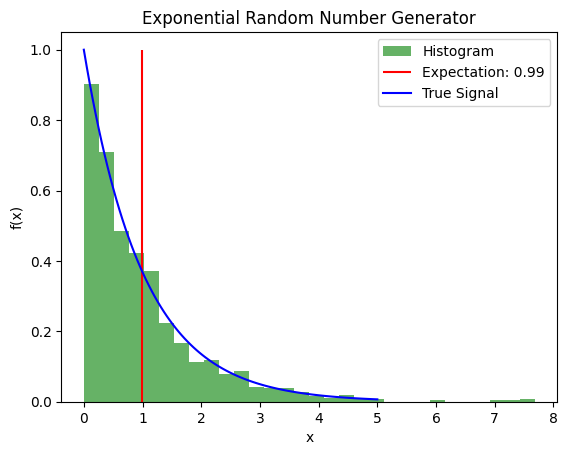

In [14]:
### ADD YOUR CODE ###
lam = 1
N = 1000

draws = []
for i in range(N):
    draws.append(exponential_rng(lam))
draws_expectation = np.mean(draws)

# true signal
x = np.linspace(0, 5, 100)
y = np.exp(-x/lam)/lam

plt.hist(draws, bins=30, density=True, alpha=0.6, color='g', label='Histogram')
plt.vlines(draws_expectation, 0, 1, color='red', label=f"Expectation: {draws_expectation:.2f}")
plt.plot(x, y, color='blue', label='True Signal')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Exponential Random Number Generator")
plt.legend()
plt.show()

# Homogeneous Poisson process
## Define a function to generate arrivals according to Poisson process

In [17]:
def homogeneous_poisson_process(lam, T):
    ### ADD YOUR CODE ###
    t = 0
    times = []
    while t < T:
        t += exponential_rng(1/lam)
        times.append(t)
    return times

## Generate homogeneous Poisson process

In [27]:
### ADD YOUR CODE ###
lam = 1
T = 10000

times = homogeneous_poisson_process(lam, T)

## Plot arrival times

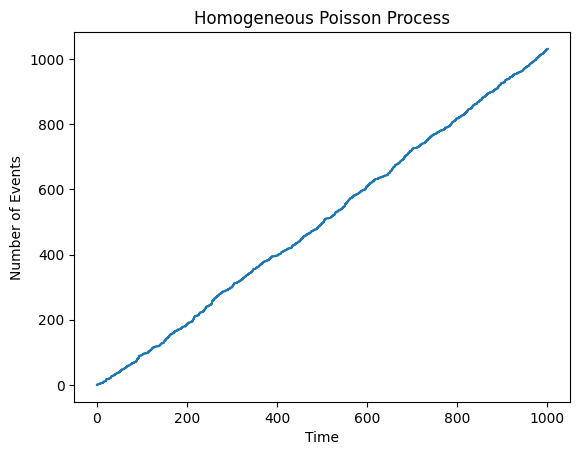

In [22]:
### ADD YOUR CODE ###
plt.step(times, range(len(times)), where='post')
plt.xlabel("Time")
plt.ylabel("Number of Events")
plt.title("Homogeneous Poisson Process")
plt.show()

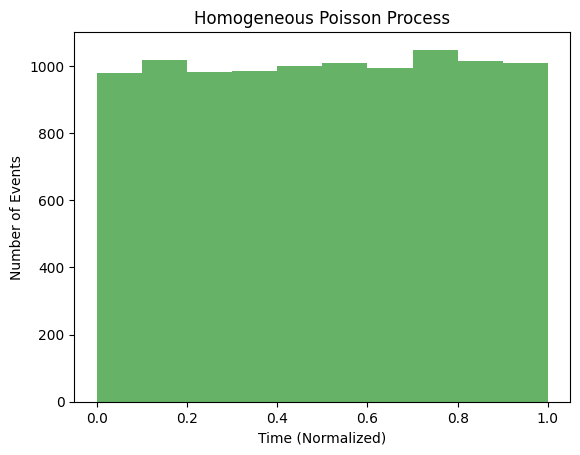

In [30]:
# plot arrival time within Poisson process period vs Arrival count
plt.hist(times/np.max(times), bins=10, density=False, alpha=0.6, color='g', label='Histogram')
plt.xlabel("Time (Normalized)")
plt.ylabel("Number of Events")
plt.title("Homogeneous Poisson Process")
plt.show()

# Nonhomogeneous Poisson process
## Define a function to generate arrivals according to non-homogeneous Poisson process

In [31]:
def non_homogeneous_poisson_process(lam_t, lam_max, T):
    ### ADD YOUR CODE ###
    t = 0
    times = []
    while t < T:
        t += exponential_rng(1/lam)
        r = np.random.uniform()

        if r < lam_t(t)/lam_max:
            times.append(t)
    return times

## Generate nonhomogeneous poisson processes

In [48]:
### ADD YOUR CODE ###
T = 1000000
lam_t = lambda t: 1 + np.sin(4*np.pi*t/T)
lam_max = 2


times = non_homogeneous_poisson_process(lam_t, lam_max, T)

# true signal
x = np.linspace(0, T, 100)
y = lam_t(x)

## Plot arrival times

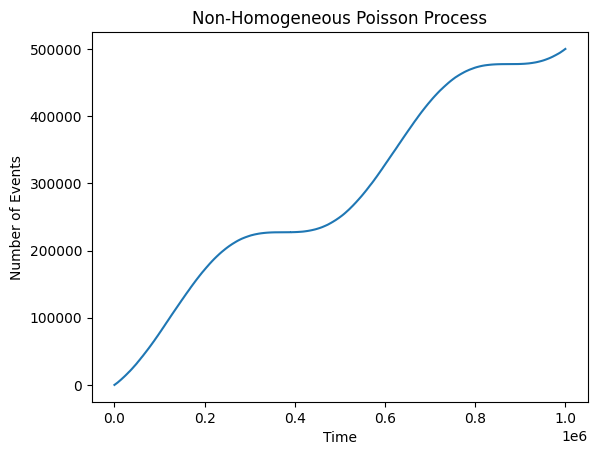

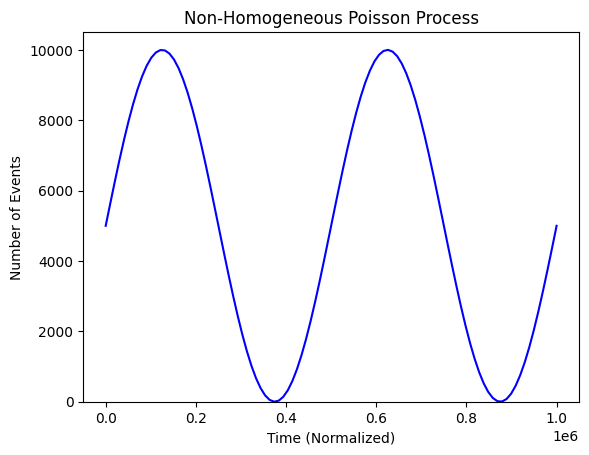

In [ ]:
### ADD YOUR CODE ###
plt.step(times, range(len(times)), where='post')
plt.xlabel("Time")
plt.ylabel("Number of Events")
plt.title("Non-Homogeneous Poisson Process")
plt.show()

# plot arrival time within Poisson process period vs Arrival count
plt.hist(times/np.max(times), bins=100, density=False, alpha=0.6, color='g', label='Histogram')
plt.xlabel("Time (Normalized)")
plt.ylabel("Number of Events")
plt.title("Non-Homogeneous Poisson Process")
plt.show()


plt.plot(x, y/lam_max*T/100, color='blue', label='True Signal')
plt.xlabel("Time")
plt.ylabel("Rate")
plt.title("Non-Homogeneous Poisson Process")
plt.show()

## Extra questions
### Efficiency

In [64]:
def non_homogeneous_poisson_process_extra0(lam_t, lam_max, T):
    ### ADD YOUR CODE ###
    count_accepted = 0
    count_rejected = 0
    t = 0
    times = []
    while t < T:
        t += exponential_rng(1/lam)
        r = np.random.uniform()

        if r < lam_t(t)/lam_max:
            times.append(t)
            count_accepted += 1
        else:
            count_rejected += 1

    efficiency = count_accepted/(count_accepted + count_rejected)

    return times, efficiency

In [65]:
### ADD YOUR CODE ###
T = 1000000
lam_t = lambda t: 1 + np.sin(4*np.pi*t/T)
lam_max = 2

times, efficiency = non_homogeneous_poisson_process_extra0(lam_t, lam_max, T)
print(f"Efficiency: {efficiency}")

Efficiency: 0.49994396424919096


### Piecewise lambda

In [ ]:
def non_homogeneous_poisson_process_extra1(lam_t, lam_max, T):
    """ Generates arrivals according to non-homogeneous Poisson process with time-dependent rate lam_t. 
    
    Keywords:
        lam_t (function handle): function returning the Poisson process rate at time t
        lam_max (real): maximum value of lam_t(t) to be used for generating arrivals
        T (int): duration of Poisson process
    
    Returns:
        times: array of event times
        efficiency (real): (0-1) efficiency of non-homogeneous Poisson process 
    """
    ### ADD YOUR CODE ###

In [ ]:
### ADD YOUR CODE ###
def non_homogeneous_poisson_process_extra0(lam_t, lam_max, T):
    ### ADD YOUR CODE ###
    count_accepted = 0
    count_rejected = 0
    t = 0
    times = []
    while t < T:
        t += exponential_rng(1/lam)
        r = np.random.uniform()

        if r < lam_t(t)/lam_max:
            times.append(t)
            count_accepted += 1
        else:
            count_rejected += 1

    efficiency = count_accepted/(count_accepted + count_rejected)

    return times, efficiency